## Analiza zbioru danych osób zdrowych, w stanie przed cukrzycowym i chorych na cukrzyce 

In [2]:
import pandas as pd
import numpy as np
import pingouin as pg
import os, os.path as op

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv(op.join('data', 'data.csv'), sep =',')

c:\Users\Krzysztof\AppData\Local\Programs\Python\Python39\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
data.shape

(253680, 22)

Zbió danych składa się z 22 kolumn - 21 jeden kolumn cechami i jedna z trzema klasami. Ponad to zbiór składa się z 253 680 rekordów. 

In [6]:
data.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

Wszytkie kolumny są ilościowe.

In [7]:
np.sum(data.isnull())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### Labels

In [8]:
data.Diabetes_012

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    2.0
253677    0.0
253678    0.0
253679    2.0
Name: Diabetes_012, Length: 253680, dtype: float64

Zbiór nie posiada braków danych wewnątrz.

### Model #1 

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.classifier import ROCAUC

In [10]:
algo = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:],data.iloc[:,0], test_size= 0.2)

param = {
    'n_estimators' : [10,50,100,150],
    'max_depth' : [2,4,8],
    'criterion' : ['gini', 'entropy']
}

In [11]:
def model_search(algo,param,x,y):
    
    search =  RandomizedSearchCV(estimator = algo, param_distributions= param, random_state= 42)
    search.fit(x,y)
    best = search.best_estimator_
    return best

In [12]:
model = model_search(algo,param,x_train,y_train)

Accuracy score: 0.8457702617470829
Recall score: 0.8457702617470829
Precision score: 0.8457702617470829


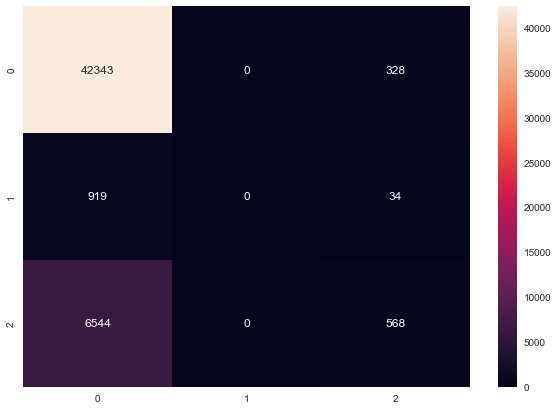

In [13]:
def valid(model, x_test, y_test):
    predictions = model.predict(x_test)
    print(f"Accuracy score: {accuracy_score(y_test,predictions)}")
    print(f"Recall score: {recall_score(y_test,predictions,average='micro')}")
    print(f"Precision score: {precision_score(y_test,predictions,average='micro')}")
    
    matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (10,7))
    sns.heatmap(matrix, annot = True, fmt = 'g')
valid(model, x_test, y_test)

c:\Users\Krzysztof\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


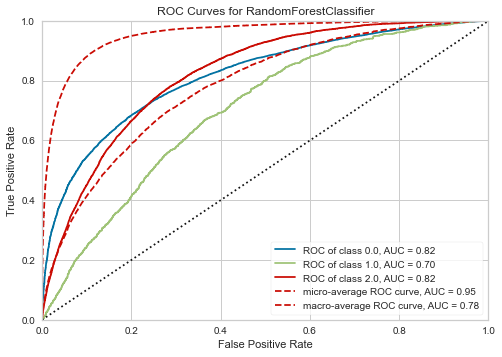

In [14]:
def ROC(model, x_test, y_test):
    """_summary_

    Args:
        model (scikit_model): trained model
        x_test (list): validation features
        y_test (lsit): validation labels
    """
    vis = ROCAUC(model)
    vis.fit(x_test,y_test)
    vis.score(x_test, y_test)
    vis.show()

ROC(model, x_test, y_test)

### Model #2

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
algo = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:],data.iloc[:,0], test_size= 0.2)

param = {
    'C' : [0.1,0.5,1,2],
    'tol' : [0.0001,0.001,0.01],
    'penalty' : ['l1', 'l2']
}

In [17]:
model = model_search(algo,param,x_train,y_train)


c:\Users\Krzysztof\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Krzysztof\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

Accuracy score: 0.8409610532954904
Recall score: 0.8409610532954904
Precision score: 0.8409610532954904


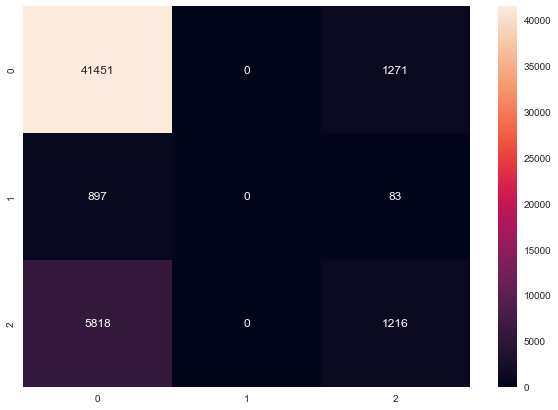

In [18]:
valid(model, x_test, y_test)

c:\Users\Krzysztof\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


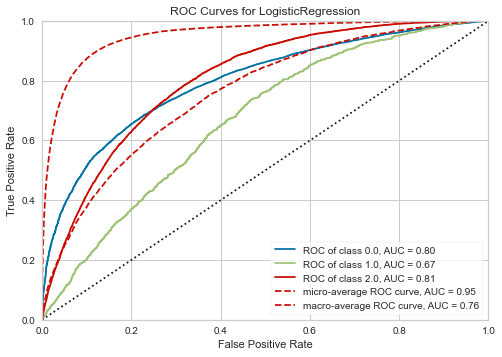

In [19]:
ROC(model, x_test, y_test)

### Model#3 Tensorflow 

In [45]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.layers import Dense
from keras.models import Sequential 
from keras.utils import np_utils

In [41]:
model = Sequential([
    Dense(42, activation = 'relu'),
    Dense(60, activation = 'relu'),
    Dense(60, activation = 'relu'),
    Dense(3, activation = 'softmax'),
])

In [42]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [43]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [47]:
dummy_y = np_utils.to_categorical(y_train)
dummy_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [46]:
model.fit(x_train,dummy_y,batch_size=5,epochs = 3, validation_split=0.2)

Epoch 1/3


TypeError: 'NoneType' object is not callable